In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
df = pd.read_csv('2017-fordgobike-tripdata.csv')

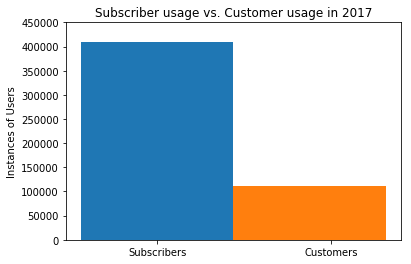

In [3]:
non_sub_count=len(df[df['user_type']=='Customer'])
sub_count=len(df[df['user_type']=='Subscriber'])

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_count, width)
p2 = plt.bar(ind+width, non_sub_count, width)

plt.ylabel('Instances of Users')
plt.title('Subscriber usage vs. Customer usage in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 500000,step=50000))

plt.show()

## Pricing of Go Ford Bike
### Customers
Single ride (up to 30 minutes) - 3.00

Day Access (unlimited 30 minute rides) - 10.00

3 Day Access (unlimited 30 minute rides) - 20.00

### Subscribers
Monthly Subscriber(unlimited 45 minutes) - 15.00

### Late Fees
Bikes kept out longer than allowed trip time - 3.00 per 15 minutes

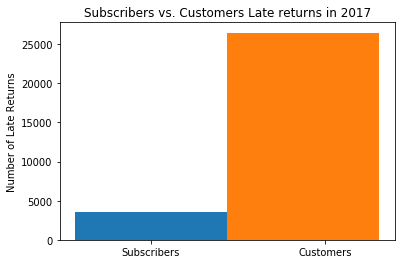

In [4]:
# want to obtain the amount of income from subscribers versus customers
# to change for seconds to minutes need to use module 60 and divide by 60
# need to obtain a list of customer that went over their allowed time, use divide 15 to see increments
late_group = df[df['duration_sec'] > 1800]
sub_late_group = late_group[late_group['duration_sec'] > 2700]
non_sub_late=late_group[late_group['user_type']=='Customer']
#Note that subscribers have a time limit of 45 minutes
sub_late=sub_late_group[sub_late_group['user_type']=='Subscriber']

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, len(sub_late), width)
p2 = plt.bar(ind+width, len(non_sub_late), width)

plt.ylabel('Number of Late Returns')
plt.title('Subscribers vs. Customers Late returns in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 30000,step=5000))

plt.show()

In [5]:
# make a list containing the number of seconds that subs went over
# can only be ran once due to stacking values
non_sub_late['duration_sec']=non_sub_late['duration_sec']- 1800
sub_late['duration_sec']=sub_late['duration_sec']-2700

c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


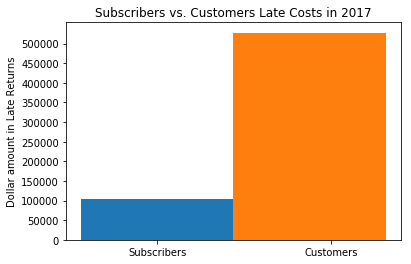

In [6]:
non_sub_late_income=non_sub_late[['user_type','duration_sec']].groupby('user_type').sum()
sub_late_income=sub_late[['user_type','duration_sec']].groupby('user_type').sum()
#divide by 60 to obtain minutes
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']/60
sub_late_income['duration_sec']=sub_late_income['duration_sec']/60
#divide by 15 to see the total increments that they went over 
non_sub_late_income['duration_sec']=math.ceil(non_sub_late_income['duration_sec']/15)
sub_late_income['duration_sec']=math.ceil(sub_late_income['duration_sec']/15)
# multiply by 3 per 15
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']*3
sub_late_income['duration_sec']=sub_late_income['duration_sec']*3

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_late_income['duration_sec'], width)
p2 = plt.bar(ind+width, non_sub_late_income['duration_sec'], width)

plt.ylabel('Dollar amount in Late Returns')
plt.title('Subscribers vs. Customers Late Costs in 2017' )
#plt.xticks(np.arange(0, 1, step=0.5), ('{}'.format('Subscribers')),'{}'.format('Customers'))
plt.xticks(np.arange(0, .80, step=0.40), ('Subscribers','Customers'))
plt.yticks(np.arange(0, 530000,step=50000))
plt.show()
#change to average latefee

In [7]:
df_route=df[['start_station_name','end_station_name','duration_sec']].groupby(['start_station_name','end_station_name']).count().sort_values('duration_sec', ascending=False)
route_20=df_route.reset_index().head(20)

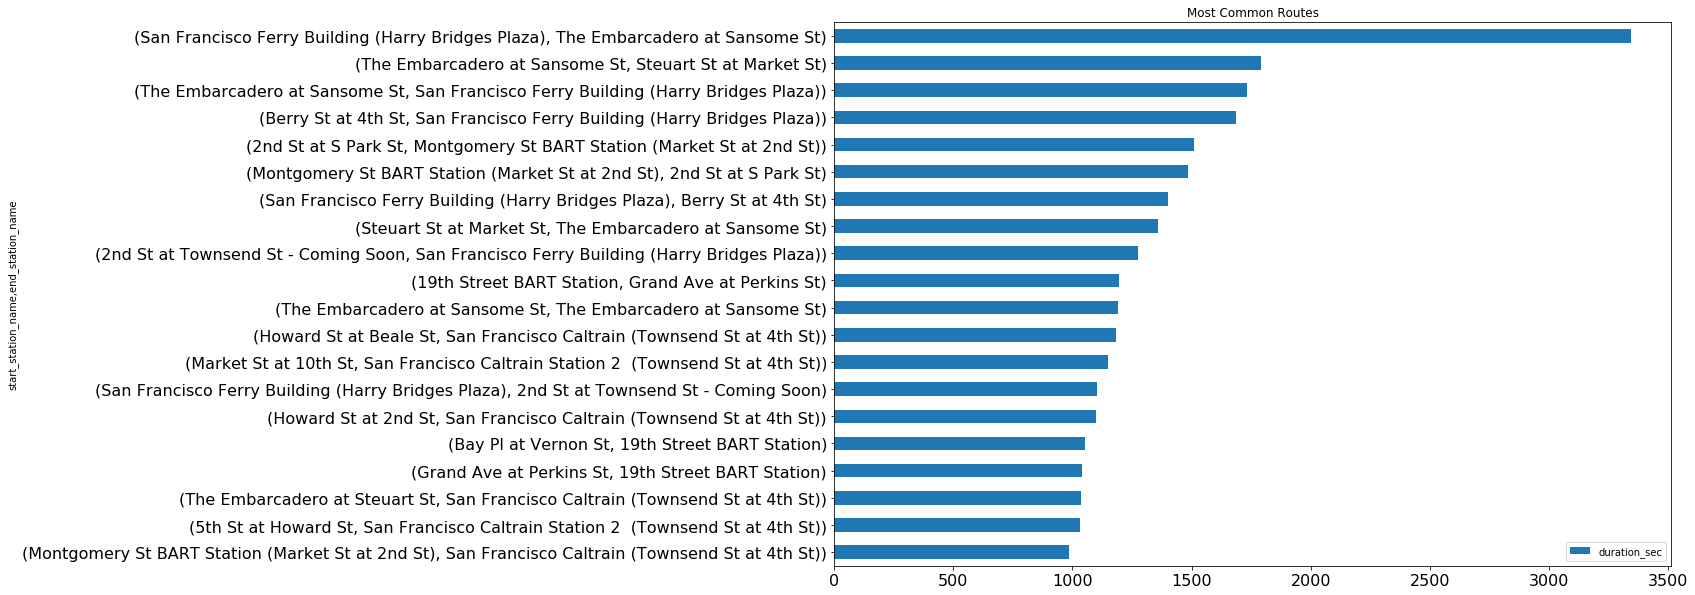

In [68]:
df_route.head(20).sort_values('duration_sec',ascending=True).plot(title='Most Common Routes',kind='barh',figsize=(15,10),fontsize=16,sort_columns=True)

In [37]:

df_route_distance = df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).count().sort_values('duration_sec', ascending=False)

distance_df = np.arange(len(df_route_distance),dtype=np.float)
#Make list, find distance, save that distance to new list
# approximate radius of earth in km
R = 6373.0
for m in range(0,len(df_route_distance)):
    start_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_latitude'])
    start_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_longitude'])
    end_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_latitude'])
    end_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_longitude'])
    
    dlon = end_long - start_long
    dlat = end_lat - start_lat

    a = math.sin(dlat / 2)**2 + math.cos(start_lat) * math.cos(end_lat) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance_df[m] = R * c
    

ValueError: Length of values does not match length of index

Text(0.5,0,'Distance is Kilometers')

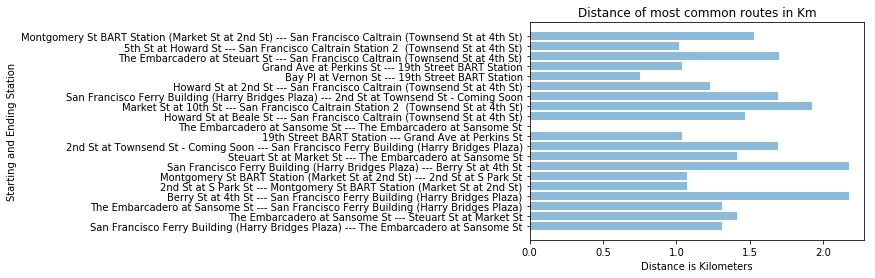

In [38]:
route_20['Distance']=distance_df[0:20]
route_20['Trip']=route_20['start_station_name'].map(str)+" --- "+route_20['end_station_name']
plt.barh(route_20['Trip'], route_20['Distance'], align='center', alpha=0.5)
plt.title('Distance of most common routes in Km')
plt.ylabel('Starting and Ending Station')
plt.xlabel('Distance is Kilometers')

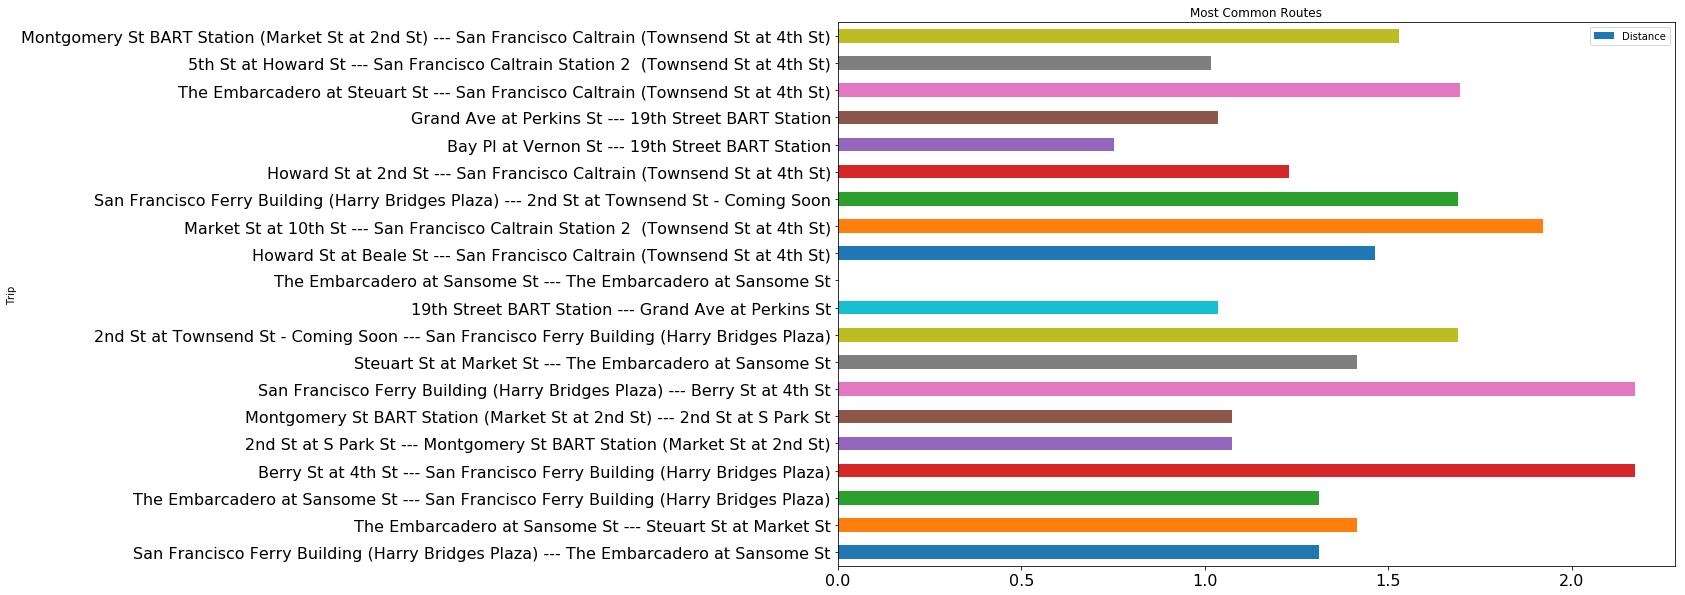

In [67]:
route_20.plot(x='Trip',y='Distance',title='Most Common Routes',kind='barh',figsize=(15,10),fontsize=16,sort_columns=True)

In [52]:
df_station_count_start=df[['start_station_name','duration_sec']].groupby(['start_station_name']).count().sort_values('duration_sec', ascending=False).reset_index()
df_station_count_end=df[['end_station_name','duration_sec']].groupby(['end_station_name']).count().sort_values('duration_sec', ascending=False).reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x43276290>]],
      dtype=object)

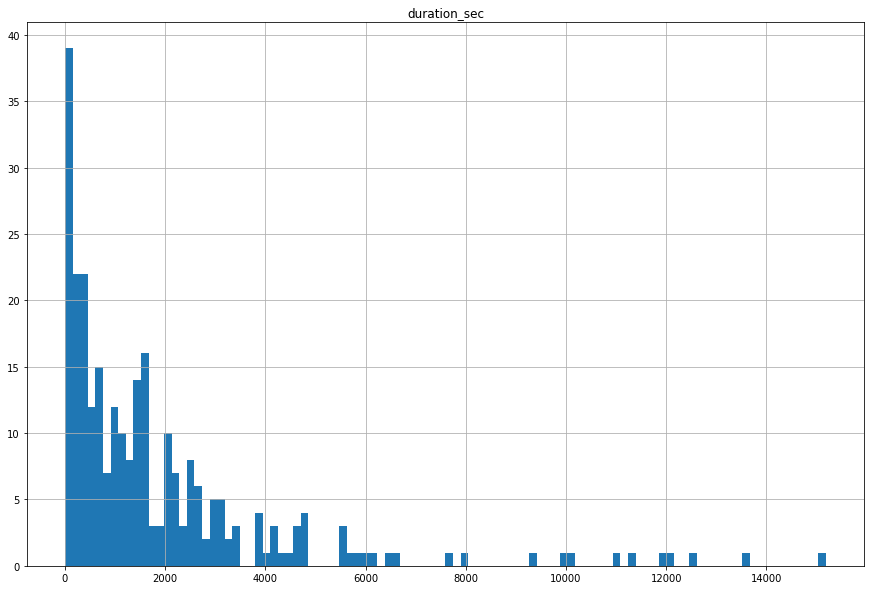

In [66]:
df_station_count_start.hist(bins=100,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x4332BAB0>]],
      dtype=object)

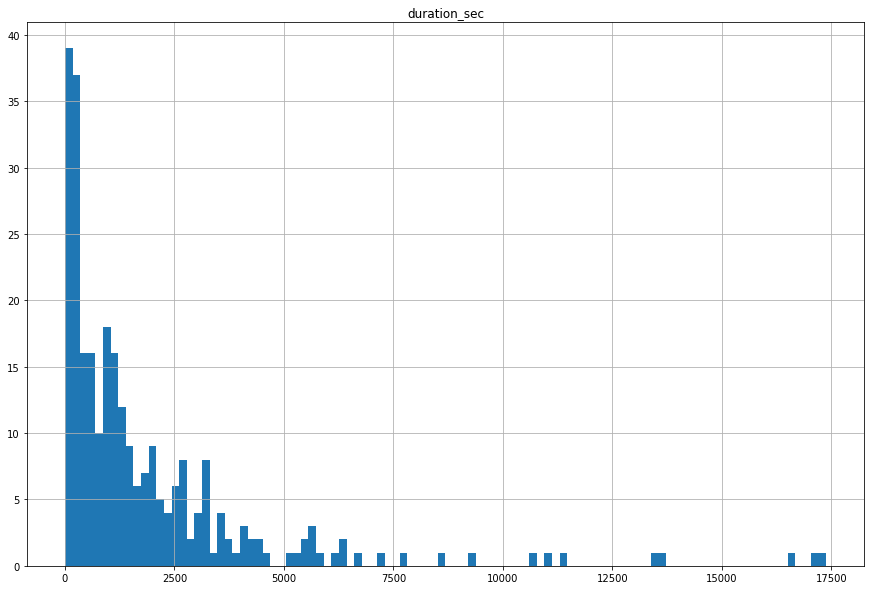

In [69]:
df_station_count_end.hist(bins=100,figsize=(15,10))

In [70]:
df_station_count_starti

,start_station_name,duration_sec
0,San Francisco Ferry Building (Harry Bridges Pl...,15187
1,The Embarcadero at Sansome St,13664
2,San Francisco Caltrain (Townsend St at 4th St),12546
3,San Francisco Caltrain Station 2 (Townsend St...,12055
4,Market St at 10th St,11960
5,Montgomery St BART Station (Market St at 2nd St),11334
6,Berry St at 4th St,10956
7,Powell St BART Station (Market St at 4th St),10142
8,Howard St at Beale St,9926
9,Steuart St at Market St,9347


In [10]:
from datetime import datetime

df['start_time']=df['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df['end_time']=df['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [11]:
df_time_index=df.set_index('start_time')

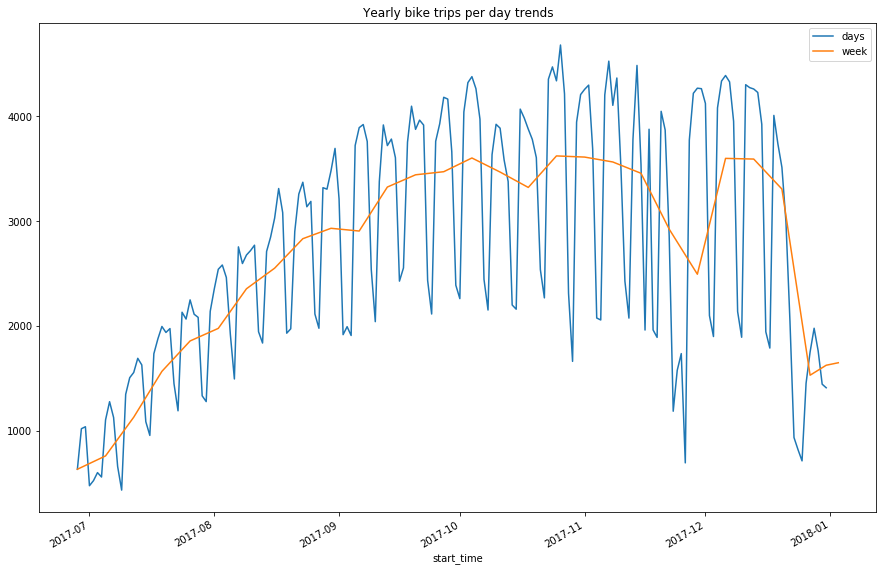

In [12]:
df_resample=df_time_index['duration_sec'].resample('D').count()
df_resample_week = df_resample.resample('W-WED').mean()
df_resample_day_and_week=pd.concat([df_resample,df_resample_week], axis=1)
df_resample_day_and_week.columns=['days','week']
df_resample_day_and_week
df_resample_day_and_week['week']=df_resample_day_and_week['week'].interpolate()
df_resample_day_and_week.plot(figsize=(15,10),title='Yearly bike trips per day trends')
#do it hourly with mean
#do it weekly, join with daily for trend
#groupby and then pivot(for stations)

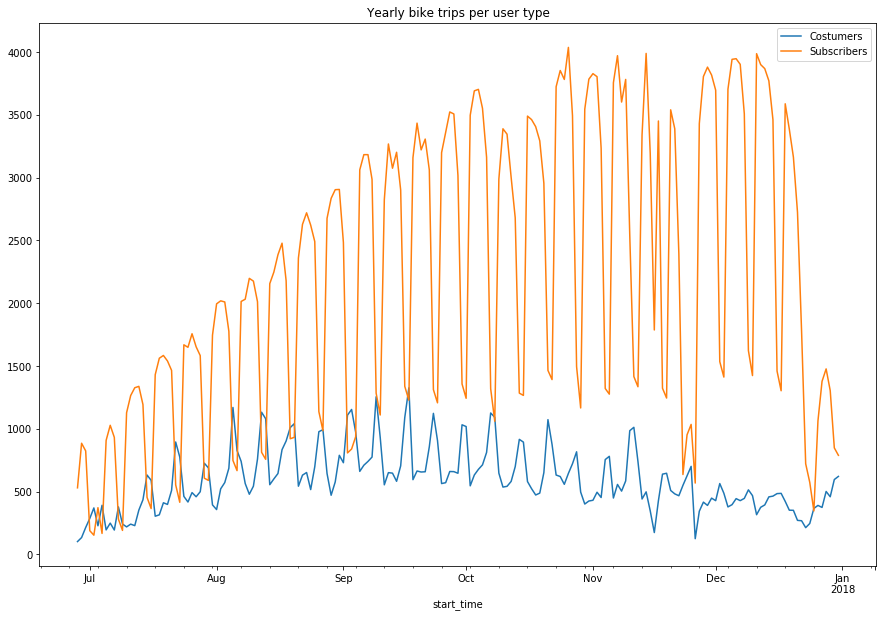

In [13]:
df_cus_time=df_time_index[df_time_index['user_type']=='Customer'].resample('D').count()
df_sub_time=df_time_index[df_time_index['user_type']=='Subscriber'].resample('D').count()
df_user_time=pd.concat([df_cus_time['duration_sec'],df_sub_time['end_time']], axis=1)
df_user_time.columns=['Costumers','Subscribers']
df_user_time.plot(figsize=(15,10),title='Yearly bike trips per user type')

Text(0.5,1,'Thanksgiving Hours of Data')

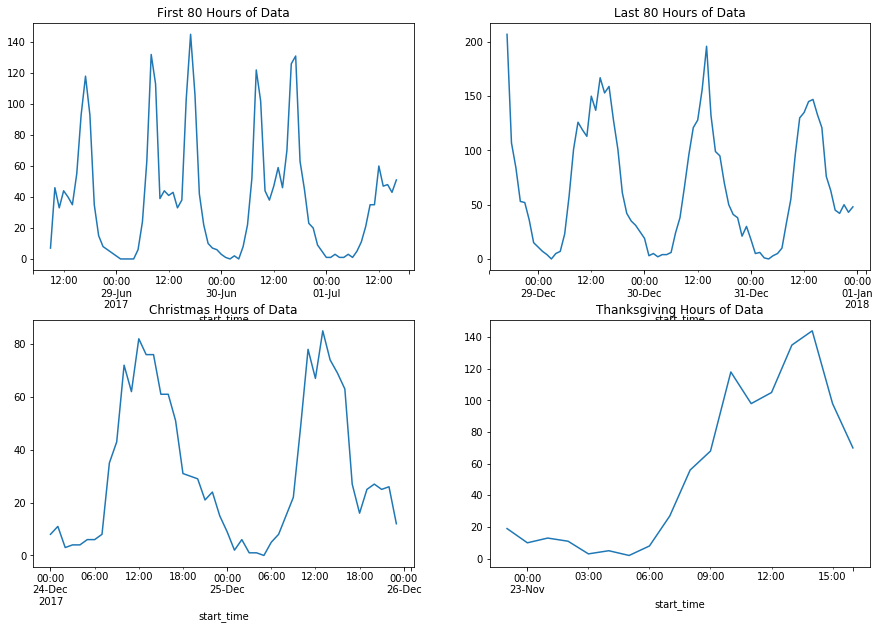

In [14]:
df_resample_hour=df_time_index['duration_sec'].resample('H').count()
fig, axes = plt.subplots(nrows=2, ncols=2)
df_resample_hour.iloc[0:80].plot(ax=axes[0,0],figsize=(15,10))
axes[0,0].set_title('First 80 Hours of Data')
df_resample_hour.iloc[4400:4500].plot(ax=axes[0,1],figsize=(15,10))
axes[0,1].set_title('Last 80 Hours of Data')
df_resample_hour.iloc[4287:4335].plot(ax=axes[1,0],figsize=(15,10))
axes[1,0].set_title('Christmas Hours of Data')
df_resample_hour.iloc[3542:3560].plot(ax=axes[1,1],figsize=(15,10))
axes[1,1].set_title('Thanksgiving Hours of Data')

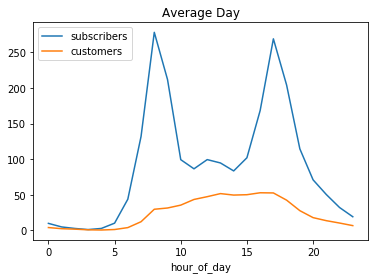

In [15]:
df_mean_day_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_day_cus=df_time_index[df_time_index['user_type']=='Customer']
df_mean_day_sub=df_mean_day_sub['duration_sec'].resample('H').count()
df_mean_day_cus=df_mean_day_cus['duration_sec'].resample('H').count()
df_mean_day_sub=df_mean_day_sub.reset_index()
df_mean_day_cus=df_mean_day_cus.reset_index()
df_mean_day_sub['hour_of_day']=df_mean_day_sub['start_time'].dt.hour
df_mean_day_cus['hour_of_day']=df_mean_day_cus['start_time'].dt.hour
df_mean_day_sub.columns=['start_time','subscribers','hour_of_day']
df_mean_day_cus.columns=['start_time','customers','hour_of_day']
df_mean_day_sub=df_mean_day_sub[['subscribers','hour_of_day']].groupby('hour_of_day').mean()
df_mean_day_cus=df_mean_day_cus[['customers','hour_of_day']].groupby('hour_of_day').mean()
df_mean_day_sub['customers']=df_mean_day_cus['customers']
df_mean_day_sub.plot(title='Average Day')

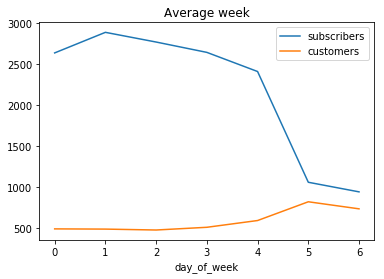

In [16]:
df_mean_week_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_week_cus=df_time_index[df_time_index['user_type']=='Customer']
df_mean_week_sub=df_mean_week_sub['duration_sec'].resample('D').count()
df_mean_week_cus=df_mean_week_cus['duration_sec'].resample('D').count()
df_mean_week_sub=df_mean_week_sub.reset_index()
df_mean_week_cus=df_mean_week_cus.reset_index()
df_mean_week_sub['day_of_week']=df_mean_week_sub['start_time'].dt.dayofweek
df_mean_week_cus['day_of_week']=df_mean_week_cus['start_time'].dt.dayofweek
df_mean_week_sub.columns=['start_time','subscribers','day_of_week']
df_mean_week_cus.columns=['start_time','customers','day_of_week']
df_mean_week_sub=df_mean_week_sub[['subscribers','day_of_week']].groupby('day_of_week').mean()
df_mean_week_cus=df_mean_week_cus[['customers','day_of_week']].groupby('day_of_week').mean()
df_mean_week_sub['customers']=df_mean_week_cus['customers']
df_mean_week_sub.plot(title='Average week')

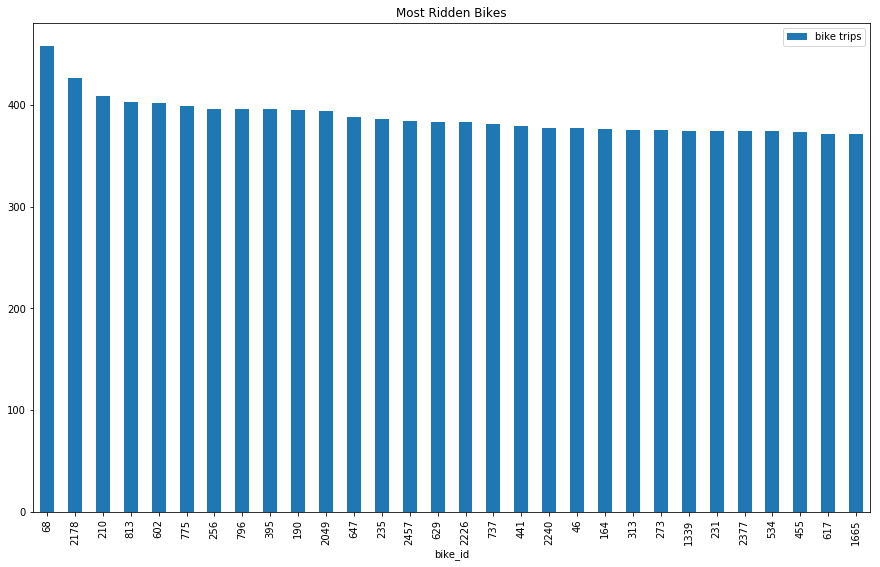

In [17]:
bike_id_count=df[['bike_id','duration_sec']].groupby(['bike_id']).count().sort_values('duration_sec', ascending=False)
# use sum with duration seconds to see which bike was the most ridden
bike_id_index = bike_id_count.index.values
bike_id_count.columns=['bike trips']
bike_id_count.head(30).plot(kind='bar', figsize=(15,9),title='Most Ridden Bikes')

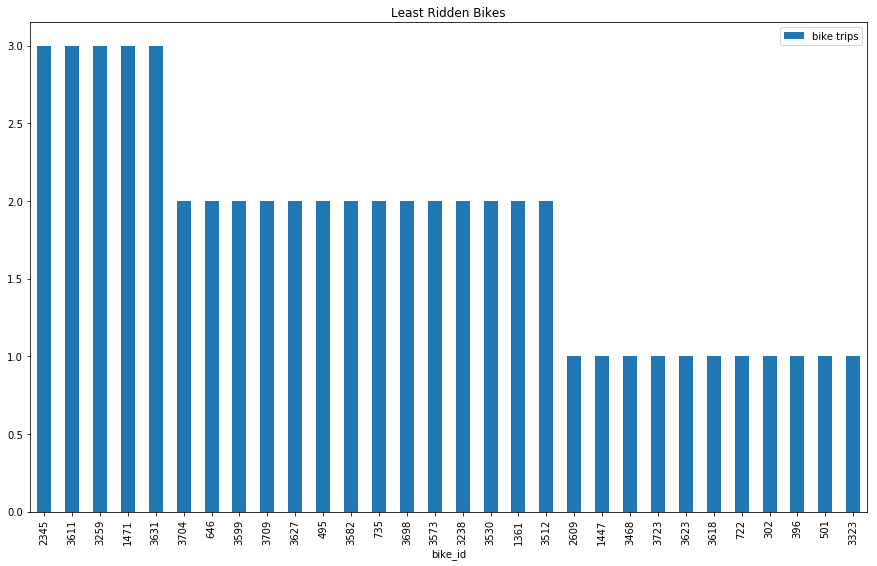

In [18]:
bike_id_count.tail(30).plot(kind='bar', figsize=(15,9),title='Least Ridden Bikes')

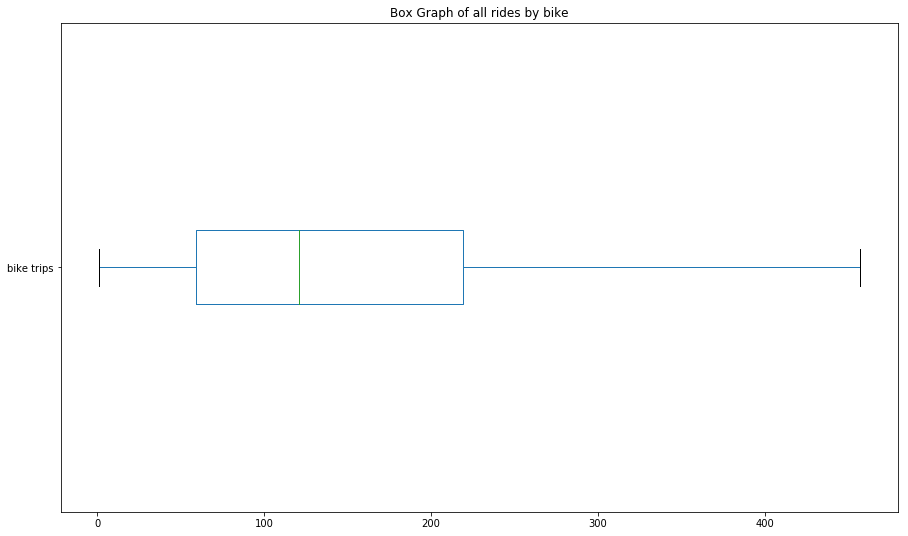

In [19]:
bike_id_count.plot.box(figsize=(15,9),vert=False,title='Box Graph of all rides by bike')

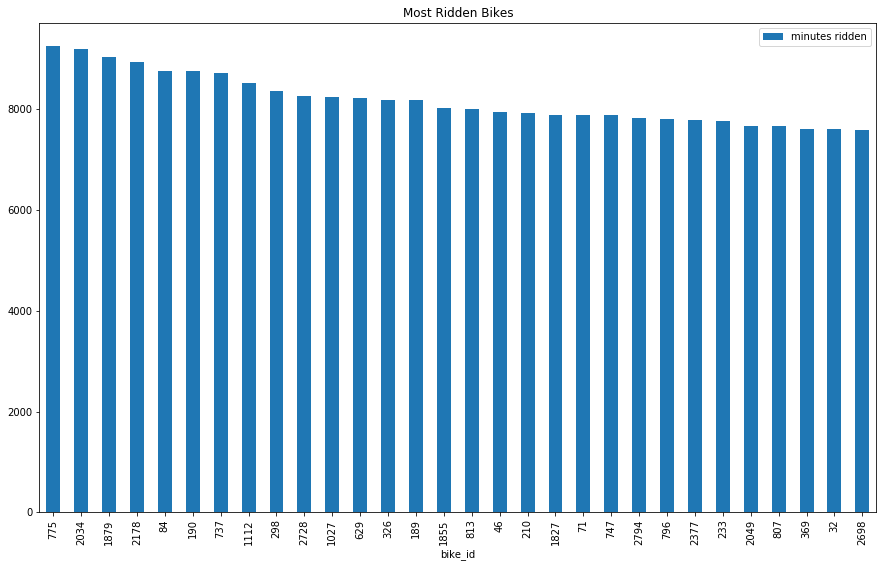

In [20]:
bike_id_sum=df[['bike_id','duration_sec']].groupby(['bike_id']).sum().sort_values('duration_sec', ascending=False)
bike_id_sum.columns=['Seconds Ridden']
bike_id_sum['Seconds Ridden']=bike_id_sum['Seconds Ridden']/60
bike_id_sum.columns=['minutes ridden']
bike_id_sum.head(30).plot(kind='bar', figsize=(15,9),title='Most Ridden Bikes')

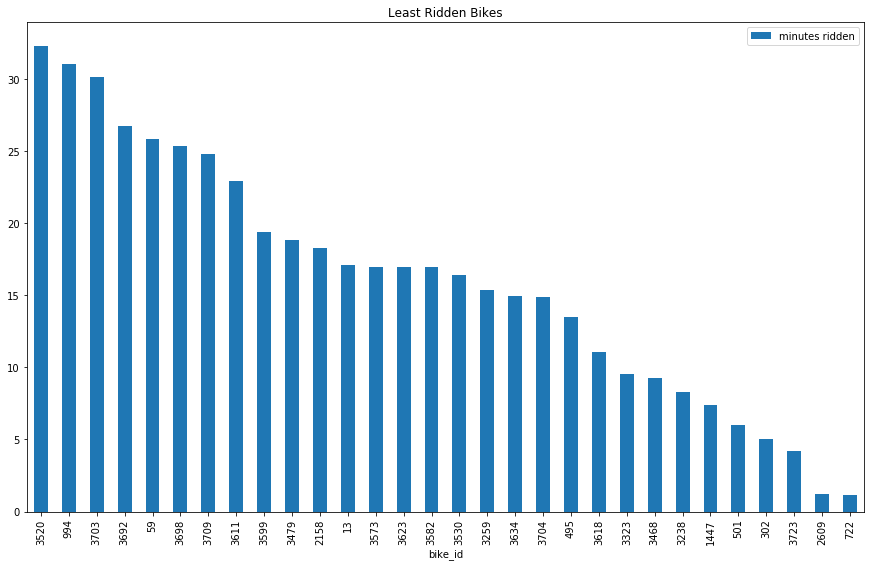

In [21]:
bike_id_sum.tail(30).plot(kind='bar', figsize=(15,9),title='Least Ridden Bikes')

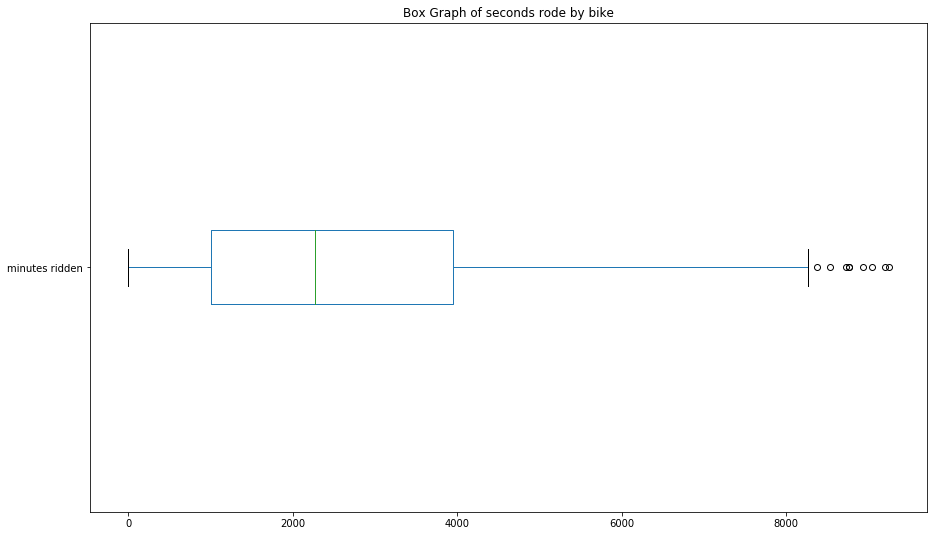

In [22]:
bike_id_sum.plot.box(figsize=(15,9),vert=False,title='Box Graph of seconds rode by bike')

Text(0,0.5,'number of total minutes')

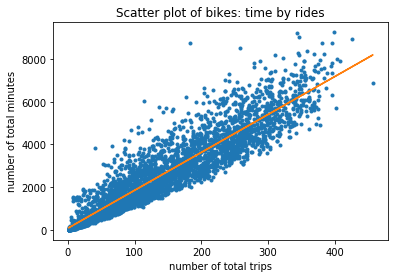

In [23]:
bike_id_count_sum = pd.concat([bike_id_count,bike_id_sum], axis=1)
# Fit with polyfit
m, b = np.polyfit(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], 1)

plt.plot(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], '.')
plt.plot(bike_id_count_sum['bike trips'], b + m * bike_id_count_sum['bike trips'], '-')
plt.title('Scatter plot of bikes: time by rides')
plt.xlabel('number of total trips')
plt.ylabel('number of total minutes')

Text(0,0.5,'quantity of bikes')

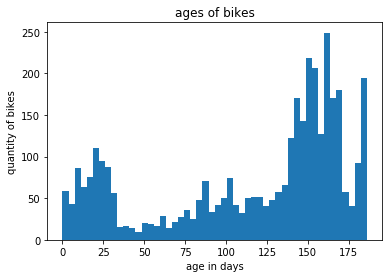

In [24]:
df_bike_age=df[['bike_id','start_time']].groupby('bike_id').agg([np.max,np.min,np.count_nonzero])
df_bike_age.columns=['last date','first date','trip count']
df_bike_age['age']= abs((df_bike_age['last date'] - df_bike_age['first date']))
df_bike_age['delta_2018']= abs(df_bike_age['last date'] - datetime(2018, 1, 1, 0, 0))
df_bike_age['age']=df_bike_age['age'].dt.days
df_bike_age['delta_2018']=df_bike_age['delta_2018'].dt.days
df_bike_age=df_bike_age.reset_index()
plt.hist(df_bike_age['age'],bins=50)
plt.title('ages of bikes')
plt.xlabel('age in days')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

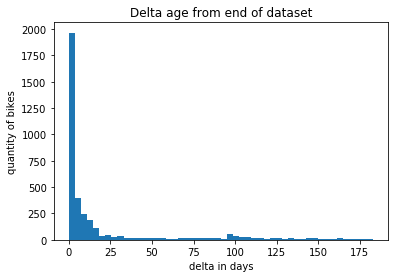

In [25]:
plt.hist(df_bike_age['delta_2018'],bins=50)
plt.title('Delta age from end of dataset')
plt.xlabel('delta in days')
plt.ylabel('quantity of bikes')

In [26]:
df_bike_age['out of commision']=df_bike_age['delta_2018'].apply(lambda x:x>25)

Text(0,0.5,'quantity of bikes')

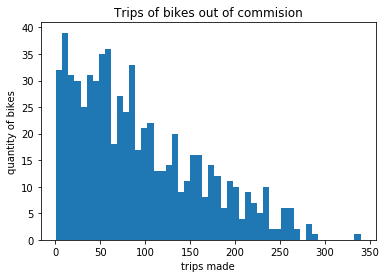

In [27]:
#df_bike_age[df_bike_age['out of commision']==True].hist(column='trip count')
plt.hist(df_bike_age[df_bike_age['out of commision']==True]['trip count'],bins=50)
plt.title('Trips of bikes out of commision')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

In [28]:
min_date=df_bike_age['first date'].min()

Text(0,0.5,'quantity of bikes')

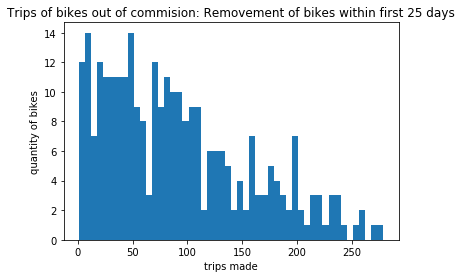

In [29]:
from datetime import timedelta
#df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)].hist(column='trip count',bins=20)
plt.hist(df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)]['trip count'],bins=50)
plt.title('Trips of bikes out of commision: Removement of bikes within first 25 days')
plt.xlabel('trips made')
plt.ylabel('quantity of bikes')

In [30]:
from scipy.stats import poisson
df_bike_age['poisson_trip']=poisson.cdf(df_bike_age['trip count'],df_bike_age['trip count'].mean())

Text(0,0.5,'quantity of bikes')

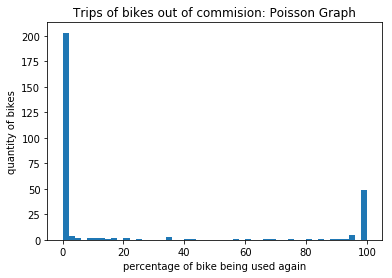

In [31]:
#df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)].hist(column='poisson_age',bins=20)
plt.hist(df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)]['poisson_trip']*100,bins=50)
plt.title('Trips of bikes out of commision: Poisson Graph')
plt.xlabel('percentage of bike being used again')
plt.ylabel('quantity of bikes')

In [32]:
bike_id_count['poisson_trips']=poisson.cdf(bike_id_count['bike trips'],bike_id_count['bike trips'].mean())
#print(poisson.cdf(50,bike_id_count['bike trips'].mean()))
#bike_id_count.hist(column='poisson_trips',bins=20)

Text(0,0.5,'quantity of bikes')

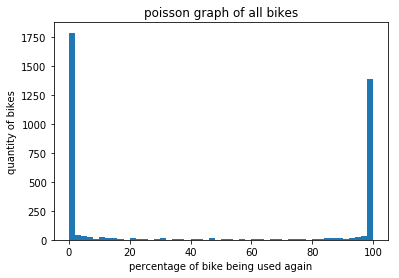

In [33]:
#bike_id_count.hist(column='poisson_trips',bins=20)
plt.hist(bike_id_count['poisson_trips']*100,bins=50)
plt.title('poisson graph of all bikes')
plt.xlabel('percentage of bike being used again')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

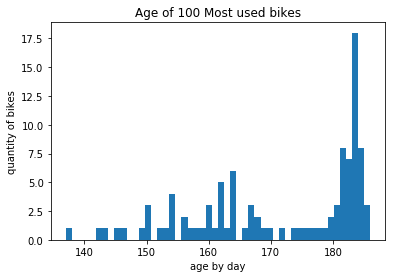

In [34]:
df_bike_top=df_bike_age.sort_values('trip count', ascending=False).head(100)
plt.hist(df_bike_top['age'],bins=50)
plt.title('Age of 100 Most used bikes')
plt.xlabel('age by day')
plt.ylabel('quantity of bikes')

Text(0,0.5,'quantity of bikes')

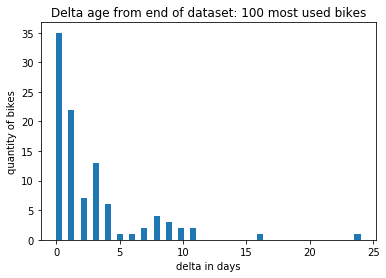

In [35]:
plt.hist(df_bike_top['delta_2018'],bins=50)
plt.title('Delta age from end of dataset: 100 most used bikes')
plt.xlabel('delta in days')
plt.ylabel('quantity of bikes')

Text(0,0.5,'age of bike (days)')

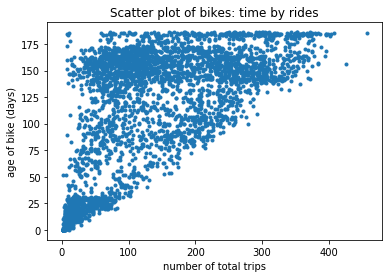

In [36]:
#df_bike_age
# Fit with polyfit
#m, b = np.polyfit(df_bike_age['trip count'], df_bike_age['age'], 1)

plt.plot(df_bike_age['trip count'], df_bike_age['age'], '.')
#plt.plot(df_bike_age['trip count'], b + m * df_bike_age['trip count'], '-')
plt.title('Scatter plot of bikes: time by rides')
plt.xlabel('number of total trips')
plt.ylabel('age of bike (days)')